<a href="https://colab.research.google.com/github/nurshat-ababakirov/poshan-food-insecurity/blob/main/notebooks/poshan_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic: Some aspects of food insecurity in Nepal


---


Hey!

I have come across this interesting research conducted by the John Hopkins Unversity (JHU) to assess drivers of malnutrition in Nepal in 2013-2015.

The aim of the survey as to assess nutritional status, diet and morbidity of preschool aged children and their mothers, and recently married, nulliparous women, and household food security, agricultural practices, participation in services and programs, among other factors, and examine associations between agricultural practices and food security, nutritional status, diet and health.

The survey collected a colossal volume of data, engaging over five thousand respondents, giving it a status of nationally representative.

Here is 🔗 [the link the studay](https://archive.data.jhu.edu/dataset.xhtml?persistentId=doi:10.7281/T1/EM61IB).

**This study is important because Nepal has a serious prevalence of stunting at 35.8%, and underweight at 27.1% in children under 5 years of age.**

This is a considerable risk for the country's long term development as stunting affects the cognitive abilities of children and strips of their opportunity to fully develop their potential.

The study contains CSV files, broken down based on different aspects of households' economic life, profiles of the household members, such as women and children, market prices as well as agricultural practices.

In this excercise I will not explore the whole data, but rather focus on some aspects of behavioral impact, especially of mothers, on stunting of their children.

Before we proceed further, I invite you to watch this short movie about the food security issues in Nepal to have a better understanding and visual picture of the context.

# Watch it for inspiration for action: "Improving food security in Nepal"

📹 ⬇

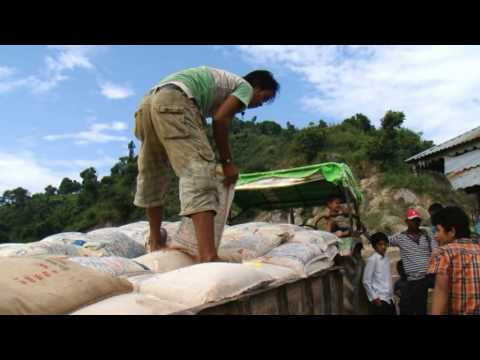

In [10]:
from IPython.display import YouTubeVideo

video_id = '8PdeeYH7yZc'

YouTubeVideo(video_id)

# Data set

Let us talk about the data we have.

The JHU kindly made all the datasets available. It has files for Excel, Stata, as well as csv files which we will use given that I will be analyzing them through Python.  

The only problem is all the different files are zipped as one. So instead of telling Python to directly download from the website, we will help her by picking the files that we want to work with and uploading them to a google drive. Python will take it from there.

#My Hypothesis

My hypothesis is that the weight/height (i.e. stunting) of children in rural Nepal are also impacted by the behavioural practices such as:

*  **Duration of breastfeeding**
*  **Hygiene**
*  etc (let us explore what the dataset has)

##For that we will look at these CSV files

1.   f3 Household Roster
1.   f4 Household land
2.   f6 Women form - added
1.   f7 Children Form (<5) - added




In [11]:
import pandas as pd

# Making data available for Python

So we uploaded the files we want to our google drive and gave it to Python.

See below:

In [12]:
# Women form
women_form = pd.read_csv ('/content/drive/MyDrive/SIPA/2023-24/Python class/final project/f6_WF_P1_Sheet1.csv')

# Children form
children_form = pd.read_csv ("/content/drive/MyDrive/SIPA/2023-24/Python class/final project/f7_CF_P1_Sheet1.csv")
children_form

# Household roster
household_roster = pd.read_csv ("/content/drive/MyDrive/SIPA/2023-24/Python class/final project/f3_HHR_P1_Sheet1.csv")

# Household form
household_form = pd.read_csv('/content/drive/MyDrive/SIPA/2023-24/Python class/final project/f4_HHF_P1_Sheet1.csv')

# Adults in household (will not merge it yet, as it has many duplicates as per Household ID)
adults_in_household = pd.read_csv('/content/drive/MyDrive/SIPA/2023-24/Python class/final project/f3_Adult_P1_Sheet1.csv')


# Explore data sets


1.   Women
2.   Children
1.   Household Roster
2.   Household

## I'm excited! Let us see what they have inside:

Let us pick the data sets containting information about women and children.

In [13]:
women_form


,womanid_usaid,hhid_usaid,region,clusterid,district,f6wint,f6wprick,f6cint,f6cprick,f6return,...,f6muac1,f6muac2,f6muac3,f6height1,f6height2,f6height3,f6m_4,f6hemo,f6editor,f6keyer
0,A00001,H00034,3,37,17,1,9,1,9,1,...,25,25,25,141,141,141,0,100,9,3
1,A00004,H05121,3,8,18,1,9,97,97,1,...,27,27,27,153,153,153,0,100,6,7
2,A00005,H08007,3,11,15,1,9,1,9,1,...,28,28,28,151,151,151,0,100,3,6
3,A00008,H02874,3,21,17,1,9,1,9,1,...,22,22,23,143,144,144,0,100,9,7
4,A00009,H03153,2,52,9,1,1,1,1,1,...,27,28,28,152,152,152,2,12,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,A09052,H03477,3,45,21,1,9,1,9,1,...,26,26,26,156,156,156,0,100,5,7
4667,A09056,H08135,1,6,3,97,97,97,97,97,...,100,100,100,1000,1000,1000,97,100,10,6
4668,A09058,H04621,3,44,17,1,9,1,9,1,...,23,23,23,143,143,143,0,100,8,7
4669,A09059,H03273,1,27,6,1,9,1,9,1,...,24,24,24,145,145,145,0,100,11,7


In [14]:
children_form

,childid_usaid,hhid_usaid,womanid_usaid,dadid_usaid,region,clusterid,district,f7int_date,f7intver,f7rela,...,f7fgmuacz,f7cstustat,f7cstutyp,f7cwasstat,f7cwastyp,f7cuwstat,f7cuwtyp,f7cadhem,f7canemstat,f7canemtyp
0,K00001,H04777,A04919,A04833,3,49,20,5/1/2013,2,1,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,1.0,2.0
1,K00002,H01793,A06631,NaN,3,11,15,6/1/2013,27,1,...,0.0,1.0,2.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
2,K00003,H03768,A03216,A01968,2,30,14,7/1/2013,31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,K00004,H05015,A06825,A04852,3,8,18,7/1/2013,3,1,...,0.0,1.0,2.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
4,K00005,H04837,A08034,A04043,1,17,2,7/1/2013,49,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537,K05538,H07555,A07335,NaN,2,48,8,6/1/2013,66,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5538,K05539,H01080,A04177,A01635,2,13,12,5/1/2013,75,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5539,K05540,H03899,A04078,A08016,3,7,20,6/1/2013,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5540,K05541,H02898,A02446,NaN,2,1,10,6/1/2013,47,1,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,8.0,1.0,2.0


# Observation

I see that it is quite a rich data, judging by the number of rows (over five thousand) and columns (over 240).

The children's data frame has more rows.

It is explainable because some women in a household may not necessarily have children and some women can have multiple children.

Hence the difference.

## Unique value

The great thing is both data frames have a unique value that they share.

In our case it is women's ID.

Because the survey was funded by USAID by added 'usa' to 'id' to obviously recognize their funder.

A smart move!




---

\

In [15]:
child_woman = pd.merge(children_form, women_form, on='womanid_usaid', how = 'inner')
child_woman

,childid_usaid,hhid_usaid_x,womanid_usaid,dadid_usaid,region_x,clusterid_x,district_x,f7int_date,f7intver,f7rela,...,f6muac1,f6muac2,f6muac3,f6height1,f6height2,f6height3,f6m_4,f6hemo,f6editor,f6keyer
0,K00001,H04777,A04919,A04833,3,49,20,5/1/2013,2,1,...,22,22,22,151,151,151,2,12,11,7
1,K00002,H01793,A06631,NaN,3,11,15,6/1/2013,27,1,...,20,20,20,150,150,150,0,100,3,6
2,K00003,H03768,A03216,A01968,2,30,14,7/1/2013,31,1,...,26,26,26,160,160,160,0,100,5,7
3,K00004,H05015,A06825,A04852,3,8,18,7/1/2013,3,1,...,25,25,25,149,149,149,0,100,9,7
4,K00005,H04837,A08034,A04043,1,17,2,7/1/2013,49,1,...,23,23,23,155,155,155,0,100,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,K05538,H07555,A07335,NaN,2,48,8,6/1/2013,66,1,...,23,23,23,152,152,152,0,100,11,7
5525,K05539,H01080,A04177,A01635,2,13,12,5/1/2013,75,1,...,23,23,23,159,159,159,0,100,11,7
5526,K05540,H03899,A04078,A08016,3,7,20,6/1/2013,2,1,...,30,30,30,148,148,148,0,100,8,6
5527,K05541,H02898,A02446,NaN,2,1,10,6/1/2013,47,1,...,22,22,22,149,149,149,2,13,11,2


#Observation

The total number decreased from 5542 to 5529, because we asked Python to exclude those which didn't match.

It is quite a small decrease, so we will not spend time exploring which data we discarded.

\

---

Let us keep moving
👇

\
Now we want to merge our Child_Woman data frame with Household data frame.

💡 They also share a unique value which in this case is household ID.

⚠ However we notice in our Child_Woman data frame the household ID is denoted as hhid_usaid_x, which has x that household data frames don't have.

So let us get rid of this 'x'.

Here you go!

\


In [16]:
child_woman.rename(columns={'hhid_usaid_x': 'hhid_usaid'}, inplace=True)
child_woman

,childid_usaid,hhid_usaid,womanid_usaid,dadid_usaid,region_x,clusterid_x,district_x,f7int_date,f7intver,f7rela,...,f6muac1,f6muac2,f6muac3,f6height1,f6height2,f6height3,f6m_4,f6hemo,f6editor,f6keyer
0,K00001,H04777,A04919,A04833,3,49,20,5/1/2013,2,1,...,22,22,22,151,151,151,2,12,11,7
1,K00002,H01793,A06631,NaN,3,11,15,6/1/2013,27,1,...,20,20,20,150,150,150,0,100,3,6
2,K00003,H03768,A03216,A01968,2,30,14,7/1/2013,31,1,...,26,26,26,160,160,160,0,100,5,7
3,K00004,H05015,A06825,A04852,3,8,18,7/1/2013,3,1,...,25,25,25,149,149,149,0,100,9,7
4,K00005,H04837,A08034,A04043,1,17,2,7/1/2013,49,1,...,23,23,23,155,155,155,0,100,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,K05538,H07555,A07335,NaN,2,48,8,6/1/2013,66,1,...,23,23,23,152,152,152,0,100,11,7
5525,K05539,H01080,A04177,A01635,2,13,12,5/1/2013,75,1,...,23,23,23,159,159,159,0,100,11,7
5526,K05540,H03899,A04078,A08016,3,7,20,6/1/2013,2,1,...,30,30,30,148,148,148,0,100,8,6
5527,K05541,H02898,A02446,NaN,2,1,10,6/1/2013,47,1,...,22,22,22,149,149,149,2,13,11,2


# More Merging

Let us merge our two data frames related to households.


*   Household roster
*   Household


 Smooth and easy. Their merging point is hhid_usaid as a unique value.  

👇


In [17]:
#Merging Household Roster and Household Form on HouseholdID

households = pd.merge(household_roster, household_form, on='hhid_usaid', how='inner')
households

,hhid_usaid,region_x,clusterid_x,district_x,f3int_date,f3intvr,f3hhint,f3return,f3adl_no,f3relgn,...,f4ob_3c,f4oc_1,f4oc_2,f4oc_3a,f4oc_3b,f4oc_3c,f4sescr,f4sescat,f4hfiasscr,f4hfiasct
0,H00159,1,22,1,7/1/2013,78,1,1,2,1,...,97,0,0,97,97,97,-3.0,1.0,0.0,1.0
1,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,97,0,0,97,97,97,-2.0,2.0,2.0,2.0
2,H04859,1,22,1,7/1/2013,77,1,1,3,1,...,97,0,0,97,97,97,-3.0,1.0,0.0,1.0
3,H06333,1,22,1,7/1/2013,78,1,1,2,1,...,97,0,0,97,97,97,-2.0,1.0,12.0,3.0
4,H08961,1,25,1,6/1/2013,79,1,1,2,1,...,97,0,0,97,97,97,-2.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,H04538,3,54,21,6/1/2013,61,1,1,3,1,...,97,0,0,97,97,97,3.0,5.0,0.0,1.0
4283,H07578,3,54,21,6/1/2013,40,1,1,2,1,...,97,0,0,97,97,97,0.0,4.0,0.0,1.0
4284,H08573,3,54,21,6/1/2013,61,1,1,2,1,...,97,0,0,97,97,97,4.0,5.0,0.0,1.0
4285,H02471,3,54,21,6/1/2013,38,1,1,2,1,...,97,0,0,97,97,97,NaN,NaN,6.0,2.0


# Merging the two merged data sets

Let us marry our two merged data frames: Child_Woman and Households.

# Observation

There we can see that the total number of rows did not change. So the information in the data sets are quite consistent. Well done 🙏 to those who collected and prepared the information.

\



In [18]:
child_woman_household = pd.merge(households, child_woman, on='hhid_usaid', how='inner')
child_woman_household

,hhid_usaid,region_x_x,clusterid_x_x,district_x_x,f3int_date,f3intvr,f3hhint,f3return,f3adl_no,f3relgn,...,f6muac1,f6muac2,f6muac3,f6height1,f6height2,f6height3,f6m_4,f6hemo,f6editor,f6keyer
0,H00159,1,22,1,7/1/2013,78,1,1,2,1,...,23,23,23,149,149,149,0,100,7,6
1,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,26,26,26,158,158,158,0,100,5,6
2,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,26,26,26,158,158,158,0,100,5,6
3,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,22,22,22,158,158,158,0,100,5,6
4,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,22,22,22,158,158,158,0,100,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,H07578,3,54,21,6/1/2013,40,1,1,2,1,...,29,29,29,156,157,156,0,100,3,3
5525,H08573,3,54,21,6/1/2013,61,1,1,2,1,...,19,20,19,154,154,154,0,100,12,3
5526,H02471,3,54,21,6/1/2013,38,1,1,2,1,...,23,23,23,146,146,146,2,13,12,3
5527,H02471,3,54,21,6/1/2013,38,1,1,2,1,...,23,23,23,146,146,146,2,13,12,3


# Preparing the data

Now we have 980 columns with various variables, coded with unclear names.

Each code stands for a particular variable, which was made available as part of the survey zip file.

I picked the most relevant variables which I thought would be interesting to explore as potentially having some sort of impact on the stunting levels among children under five in Nepal.

We are all aware that economic hardships are the main factors of stunting among children. However, stunting can be reduced to a degree through small behavioural changes such as improving hygiene, breastfeeding, or diversifying diet with available foodstuff.

Therefore without going extensively into econonomic factors, here I have selected the following variables and will explore how they correlate.

Watch the space! 🚀

I decoded each variable, see below and grouped them as per their relevant categories:

## Key indicators of nutritional status

*   Stunt status = f7cstustat
*  Child's Weight in Kg. f7weight
*   Weight-for-Length/Height Z-Score = f7whz
*   Woman's MUAC (cm)-1 f6muac1
*   Child's height/length (cm)-1 f7length1


## Demographic Indicators

*   Age of respondent (mother,caretaker)f6moth_age
*   Total number of children aged < 5 = f3chl_no


## Behavioural variables

*   Should you wash your hands with soap after handling chicken,cow,duck,other anima f6j_6f

*   How often hustand drinks alcohol f6d_g7b

*   If husband drinks alcohol f6d_g6b
*   No. of times respondent visited to health facility (HP,outreach clinic,hospital) f6h_2
*   Should you wash your hands with soap after going to toilet f6j_6d


*   Who normally takes the decision regarding respondents own health and nutrition f6l_3j


*   Who normally takes the decision regarding daily household expenditures f6l_3h    

*   Animals kept inside the house or in the same building where HH cook and eat = f4c_8    

## Awareness Indicators

*   Age of the child when stop breast feeding = f7h_4a


## Nurtitional Variables

*  No of different types of dglv consumed within last 7 day f6c2_type
*   No of times consumed Egg (any) within last 7 days f6c1_15
*   Main source of drinking water = f4c_1  


## Farming  

*   Number of paultry hen/duck = f4l2_d
*   Number of times HH member participated in Credit or Microfinance group = f4g_o2

*   HH used improved seed/saplings/crops during last year = f4n1_d

*   HH used agrochemicals such as pesticides and herbicides during last year = f4n1_l

*   Number of HH femal member got membership in Credit or Microfinance group = f4g_o3
*   Any member of HH have own land = f4i_1      

*   Number of times HH member participated in Credit or Microfinance group = f4g_o2



#Note:
I picked quite a big lot. I will use those which I render interesting results. Not all.




In [19]:
child_woman_household_copy = child_woman_household.copy()

column_name_mapping = {
    'f7whz': 'Weight_for_Length_Height_ZScore',
    'f7cstustat': 'Stunt_Status',
    'f7h_4a': 'Age_when_Stop_Breastfeeding',
    'f7length1': 'Child_height',
    'f6d_g7b': 'Husband_Alcohol_Frequency',
    'f6d_g6b': 'Husband_Drinks_Alcohol',
    'f6c2_type': 'Types_of_DGLV_Consumed_Last_7_Days',
    'f6c1_15': 'Times_Consumed_Egg_Last_7_Days',
    'f6h_2': 'Visits_to_Health_Facility',
    'f6j_6d': 'Handwashing_After_Toilet',
    'f6j_6f': 'Handwashing_After_Handling_Animals',
    'f6l_3j': 'Decision_Health_Nutrition',
    'f6l_3h': 'Decision_Daily_Expenditures',
    'f6moth_age': 'Mother_Caretaker_Age',
    'f6muac1': "Woman_MUAC",
    'f7weight': "Child_Weight",
    'f7length1': "Child_Height_Length",
    'f3chl_no': 'Total_Children_Under_5',
    'f4n1_d': 'HH_Used_Improved_Seed',
    'f4n1_l': 'HH_Used_Agrochemicals',
    'f4c_1': 'Main_Source_Drinking_Water',
    'f4g_o3': 'Female_Members_Credit_Group',
    'f4i_1': 'Any_Member_Own_Land',
    'f4c_8': 'Animals_Inside_House',
    'f4l2_d': 'Number_of_Poultry',
    'f4g_o2': 'HH_Member_Participated_Credit_Group'
}

child_woman_household_copy.rename(columns=column_name_mapping, inplace=True)
child_woman_household_copy


,hhid_usaid,region_x_x,clusterid_x_x,district_x_x,f3int_date,f3intvr,f3hhint,f3return,f3adl_no,f3relgn,...,Woman_MUAC,f6muac2,f6muac3,f6height1,f6height2,f6height3,f6m_4,f6hemo,f6editor,f6keyer
0,H00159,1,22,1,7/1/2013,78,1,1,2,1,...,23,23,23,149,149,149,0,100,7,6
1,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,26,26,26,158,158,158,0,100,5,6
2,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,26,26,26,158,158,158,0,100,5,6
3,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,22,22,22,158,158,158,0,100,5,6
4,H02941,1,22,1,7/1/2013,79,1,1,2,1,...,22,22,22,158,158,158,0,100,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,H07578,3,54,21,6/1/2013,40,1,1,2,1,...,29,29,29,156,157,156,0,100,3,3
5525,H08573,3,54,21,6/1/2013,61,1,1,2,1,...,19,20,19,154,154,154,0,100,12,3
5526,H02471,3,54,21,6/1/2013,38,1,1,2,1,...,23,23,23,146,146,146,2,13,12,3
5527,H02471,3,54,21,6/1/2013,38,1,1,2,1,...,23,23,23,146,146,146,2,13,12,3


#Cleaning the data frame

Here I re-named some of the relevant variables. So I will see not their codes, but understandable information.

Because I asked Python to delete the rest of irrelevant variables, I created a copy of the data frame.

If the cleaned data frame does not provide me with relevant information, I can always return to our original data frame to conduct further analysis.

In [20]:
# List of columns to keep
columns_to_keep = list(column_name_mapping.values())

# Drop columns that are not in the list
child_woman_household_copy = child_woman_household_copy[columns_to_keep]

# Display the updated DataFrame
print(child_woman_household_copy)

      Weight_for_Length_Height_ZScore  Stunt_Status  \
0                                 0.0           0.0   
1                                -1.0           0.0   
2                                -1.0           0.0   
3                                -1.0           0.0   
4                                 0.0           0.0   
...                               ...           ...   
5524                             -1.0           1.0   
5525                              0.0           1.0   
5526                              0.0           1.0   
5527                              0.0           1.0   
5528                              0.0           0.0   

      Age_when_Stop_Breastfeeding  Child_Height_Length  \
0                              97                 58.0   
1                              12                100.0   
2                              97                 85.0   
3                              97                 75.0   
4                               3                

# Essential tools 🧰

Let us upload our key tools which will help us analize this massive data and visualize it.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm


# Statistical Regression Model

Through this logistic regression model I'm trying to understand the relationship between the age when a mother stops breastfeeding and the likelihood of a child being stunted.


In [22]:
independent_vars = [
    'Age_when_Stop_Breastfeeding'
]
dependent_var = 'Stunt_Status'

regression_data = child_woman_household_copy[independent_vars + [dependent_var]].dropna()

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data[dependent_var], regression_data[independent_vars + ['const']])
results = logit_model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.645315
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Stunt_Status   No. Observations:                 5295
Model:                          Logit   Df Residuals:                     5293
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Jun 2025   Pseudo R-squ.:                0.007135
Time:                        23:33:05   Log-Likelihood:                -3416.9
converged:                       True   LL-Null:                       -3441.5
Covariance Type:            nonrobust   LLR p-value:                 2.417e-12
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age_when_Stop_Breastfeeding    -0.0045      0.001     -6.324      0.000   

#Observation

Age_when_Stop_Breastfeeding Coefficient (-0.0045): This number tells us that as the age when a mother stops breastfeeding increases by one unit (maybe a day or a month), the odds of a child being stunted decrease by about 0.0045 times.

This seems too low.

Let us plot this correlation to see the distribution of observations.

#So here is our first finding:

For every one-unit increase in 'Age_when_Stop_Breastfeeding', the odds of being in the Stunted category decrease by approximately 0.5%.

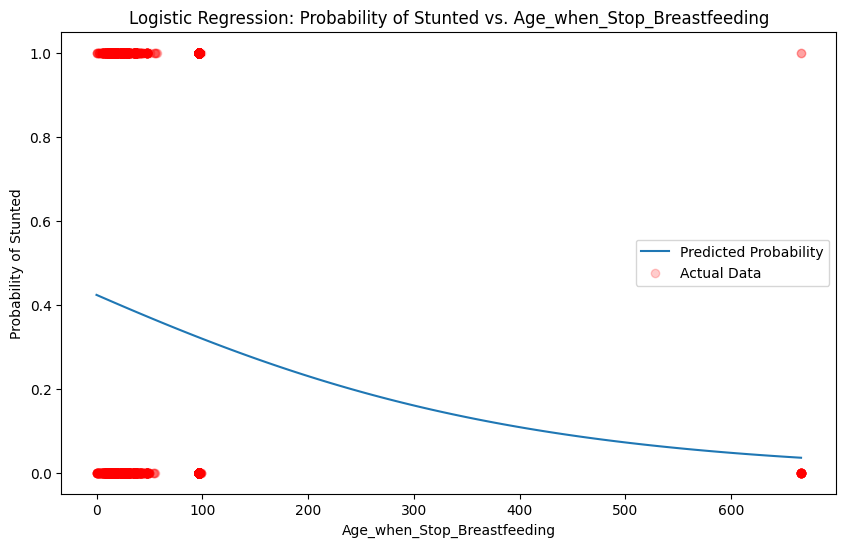

In [23]:
age_values = np.linspace(child_woman_household_copy['Age_when_Stop_Breastfeeding'].min(),
                         child_woman_household_copy['Age_when_Stop_Breastfeeding'].max(), 100)

log_odds = -0.0045 * age_values - 0.3101
odds = np.exp(log_odds)
probabilities = odds / (1 + odds)

plt.figure(figsize=(10, 6))
plt.plot(age_values, probabilities, label='Predicted Probability')
plt.scatter(child_woman_household_copy['Age_when_Stop_Breastfeeding'], child_woman_household_copy['Stunt_Status'], alpha=0.2, color='red', label='Actual Data')
plt.xlabel('Age_when_Stop_Breastfeeding')
plt.ylabel('Probability of Stunted')
plt.title('Logistic Regression: Probability of Stunted vs. Age_when_Stop_Breastfeeding')
plt.legend()
plt.show()

#Observation

Let us explore these outliers, which are impacting our regression results.



In [24]:
child_woman_household_copy[['Age_when_Stop_Breastfeeding']]

,Age_when_Stop_Breastfeeding
0,97
1,12
2,97
3,97
4,3
...,...
5524,49
5525,97
5526,97
5527,24


In [25]:
sorted_outliers = child_woman_household_copy['Age_when_Stop_Breastfeeding'].sort_values(ascending=True)
sorted_outliers

,Age_when_Stop_Breastfeeding
3599,0
2648,0
568,0
4550,0
901,0
...,...
4675,666
2110,666
3642,666
220,666


#Observation

After studying the data and the data questionnaire we see that it registeres age in months in a range between 00 and 59.

The outliers are these numbers - 98, 99, 666 - which were registered as responses "Don't know", "Missing data", etc.

So let us scrap them.

\

In [26]:
excluded_values = [97, 98, 99, 666]

child_woman_household_filtered = child_woman_household_copy[~child_woman_household_copy['Age_when_Stop_Breastfeeding'].isin(excluded_values)]

child_woman_household_filtered[['Age_when_Stop_Breastfeeding']]

,Age_when_Stop_Breastfeeding
1,12
4,3
6,12
7,24
10,30
...,...
5517,24
5519,30
5521,24
5524,49


# Re-doing

Let us re-run the regression and re-plot the correlation between the stunting status and the age when breastfeeding was stopped.


In [27]:
independent_vars = [
    'Age_when_Stop_Breastfeeding'
]
dependent_var = 'Stunt_Status'

regression_data = child_woman_household_filtered[independent_vars + [dependent_var]].dropna()

regression_data = sm.add_constant(regression_data)

logit_model = sm.Logit(regression_data[dependent_var], regression_data[independent_vars + ['const']])
results = logit_model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.670914
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Stunt_Status   No. Observations:                 2403
Model:                          Logit   Df Residuals:                     2401
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Jun 2025   Pseudo R-squ.:                0.002056
Time:                        23:33:05   Log-Likelihood:                -1612.2
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                  0.009949
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age_when_Stop_Breastfeeding    -0.0102      0.004     -2.571      0.010   

#Better results now: Impact of Age_when_Stop_Breastfeeding on Stunt_Status

Now we see more plausable results. Of course, there are some limitations in terms of model, but here we understand that limited breastfeeding period is one of the small factors that eventually result in stunting.

The results indicate that 'Age_when_Stop_Breastfeeding' is statistically significant in predicting 'Stunt_Status,' and as the age at which breastfeeding stops increases, the odds of being in the 'Stunt_Status' category decrease.

In more technical terms it means



*   For each one-unit increase in "Age_when_Stop_Breastfeeding," the odds of stunting decrease by approximately 1.02%.
*   If all other factors are zero, the odds of stunting are approximately 16.59% lower.

This is interesting!

Let us see how it looks in a graph! 📉


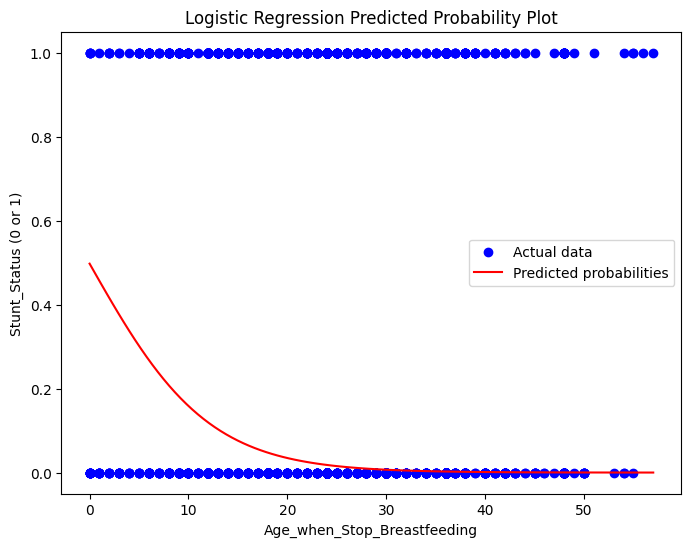

In [28]:
age_values = np.linspace(regression_data['Age_when_Stop_Breastfeeding'].min(), regression_data['Age_when_Stop_Breastfeeding'].max(), 100)

plot_data = sm.add_constant(pd.DataFrame({'Age_when_Stop_Breastfeeding': age_values}))

predicted_probs = results.predict(plot_data)

plt.figure(figsize=(8, 6))
plt.scatter(regression_data['Age_when_Stop_Breastfeeding'], regression_data[dependent_var], color='blue', label='Actual data')
plt.plot(age_values, predicted_probs, color='red', label='Predicted probabilities')
plt.title('Logistic Regression Predicted Probability Plot')
plt.xlabel('Age_when_Stop_Breastfeeding')
plt.ylabel('Stunt_Status (0 or 1)')
plt.legend()
plt.show()

#Better results now: Impact of Age_when_Stop_Breastfeeding on Stunt_Status

Great! Now, we have this graph that shows us something quite interesting.

At the beginning of the line (when the baby is just born), it's like flipping a coin 🪙 to decide if a child is stunted or not about a 50-50 chance. But as we move along the line and the age when they stop breastfeeding gets bigger, the chance of being stunted starts to go down.

When we reach around 30 months on the line, the chance of being stunted becomes very low, almost like saying it's not going to happen. So, it seems like the older kids are when they stop breastfeeding, the less likely they are to be considered stunted.

But again we should remember that that this model does not explain other factors in play in realty.

For example, diarrhea due to poor *hygiene* norms in households can be devastating for children's health.

But for now let us explore further how the period of breastfeeding affects children's wieght and height.  

👶 🤱 📊

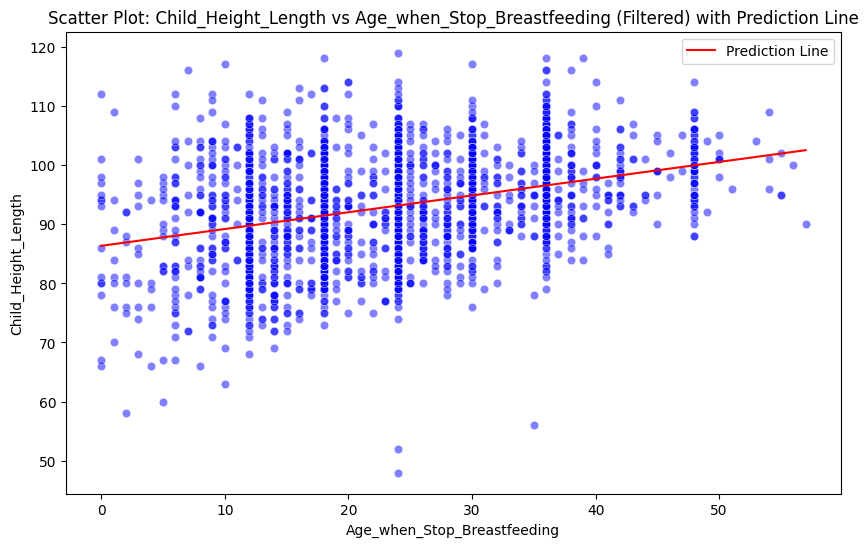

In [29]:
df = child_woman_household_copy

variable1 = 'Age_when_Stop_Breastfeeding'
variable2 = 'Child_Height_Length'

df1_filtered = df[(df[variable1] <= 80) & (df[variable2] <= 130)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_filtered, x=variable1, y=variable2, color='blue', alpha=0.5)

model_filtered_height = sm.OLS(df1_filtered[variable2], sm.add_constant(df1_filtered[variable1]))
results_filtered_height = model_filtered_height.fit()

x_values_filtered_height = np.linspace(df1_filtered[variable1].min(), df1_filtered[variable1].max(), 100)
y_values_filtered_height = results_filtered_height.params['const'] + results_filtered_height.params[variable1] * x_values_filtered_height
plt.plot(x_values_filtered_height, y_values_filtered_height, color='red', label='Prediction Line')

plt.title(f'Scatter Plot: {variable2} vs {variable1} (Filtered) with Prediction Line')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.legend()
plt.show()


#Plot: Impact of Age when stop of breastfeeding on Child's Height

The chart clearly shows the correlation between the duration of breastfeeding on children's height. The longer they are breastmilk fed, the taller they are.

Of course, despite the positive correlation we have to acknowledge the fact that this data does not show if the red line clears the stunting level.

I will come back to this question a bit later.

Follow along!

\

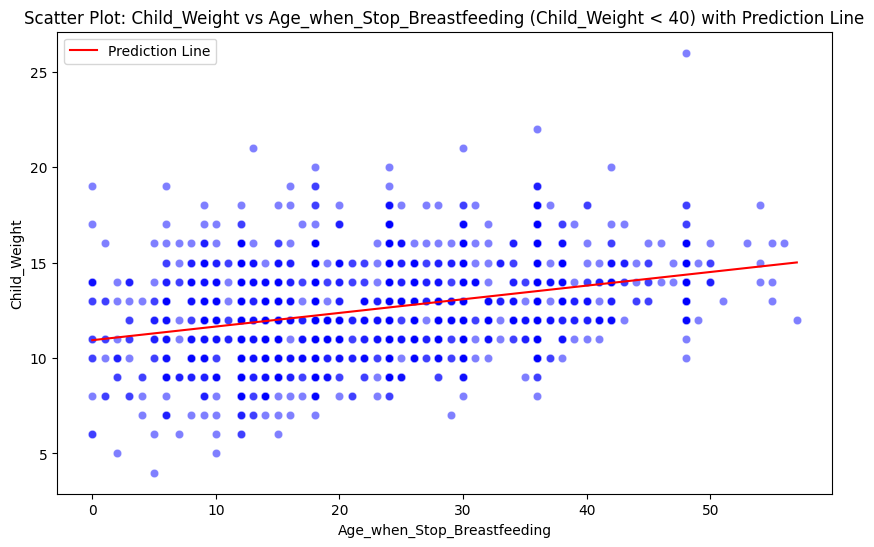

In [30]:

df = child_woman_household_filtered

independent_var = 'Age_when_Stop_Breastfeeding'
dependent_var = 'Child_Weight'

filtered_df = df[df[dependent_var] < 40]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x=independent_var, y=dependent_var, color='blue', alpha=0.5)

model_filtered = sm.OLS(filtered_df[dependent_var], sm.add_constant(filtered_df[independent_var]))
results_filtered = model_filtered.fit()

x_values_filtered = np.linspace(filtered_df[independent_var].min(), filtered_df[independent_var].max(), 100)
y_values_filtered = results_filtered.params['const'] + results_filtered.params[independent_var] * x_values_filtered
plt.plot(x_values_filtered, y_values_filtered, color='red', label='Prediction Line')

plt.title(f'Scatter Plot: {dependent_var} vs {independent_var} (Child_Weight < 40) with Prediction Line')
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.legend()
plt.show()

#Plot: Impact of Age when stop of breastfeeding on Child's Weight

Similar to a Nepalese child's height, the weight positively changes as their mothers keep feeding them with breastmilk.

However statistically well modeled or not, we see the positive correlation between breastfeedign and children's height and weight, which can easily be signs of good health.

It is worth mentioning here that **breast milk** is considered the ideal nutrition for infants. It contains the perfect mix of proteins, fats, vitamins, and antibodies needed for a baby's growth and development.

**Breast milk** is rich in antibodies and immune cells, providing natural immunity to the baby. It helps protect infants from various infections and diseases.


#Weight for Length Height Z-score

💡 In the data frame I found an interesting variable, called Weight_for_Length_Height_ZScore.

⁉ Let us see what it has inside.

In [31]:
child_woman_household_filtered[['Weight_for_Length_Height_ZScore']]

,Weight_for_Length_Height_ZScore
1,-1.0
4,0.0
6,0.0
7,1.0
10,-2.0
...,...
5517,-2.0
5519,-2.0
5521,-3.0
5524,-1.0


#Observation

We see that each child was measured against some sort of deviation. And this deviation is from Z-score, which is based on growth standards provided by recognized organizations such as the **World Health Organization (WHO)**.  

If value is 0.0, it means the child is growing according to the generally recognized standards for that age and gender.

The negative deviation means the growth rate is lagging behind, which seems to be the predominant case among the respondents.



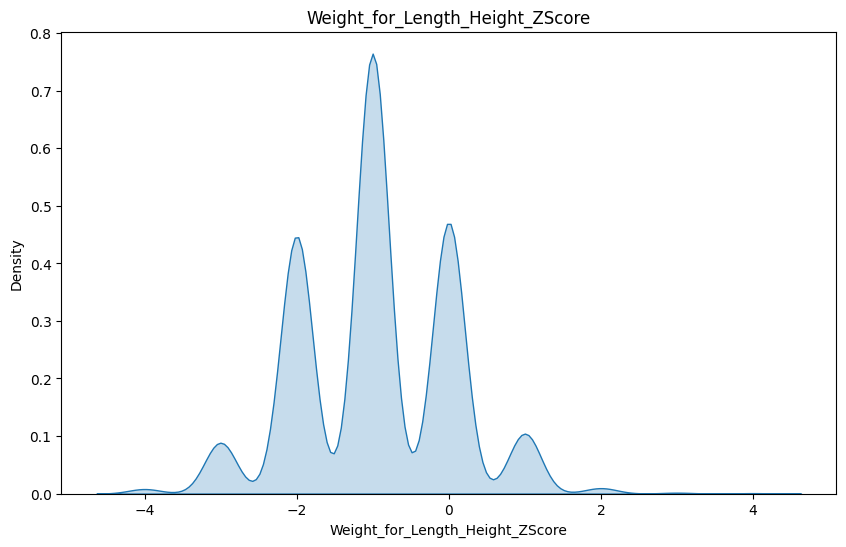

In [32]:
filtered_df = df[(df['Child_Height_Length'] < 130) & (df['Child_Weight'] < 40)]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x='Weight_for_Length_Height_ZScore', fill=True)
plt.title('Weight_for_Length_Height_ZScore')
plt.xlabel('Weight_for_Length_Height_ZScore')
plt.ylabel('Density')
plt.show()



#Observation

In this plot, the spikes around -1 and -2 suggest that a notable proportion of children in Nepal have Z-Scores one or two standard deviations below the reference median. This is concerning in the context of child stunting.

❗ **Below -2 is considered that child is stunted.**

We also there is a huge spike around -1. It also indicated quite a large number of children are undernourished due to lack of food or some illnesses.

❗Let us unpack the Stunting Status variable to see if the figures from the graph above correspond to the special variable on stunting.

👇

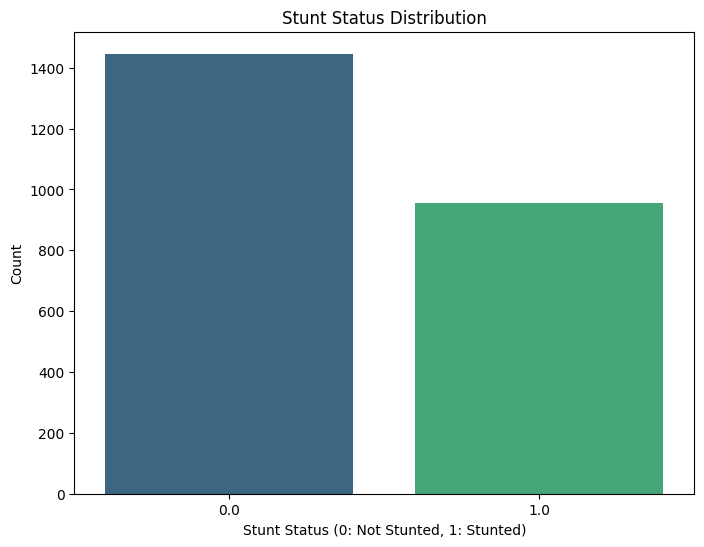

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stunt_Status', data=child_woman_household_filtered, hue='Stunt_Status', palette='viridis', legend=False)
plt.title('Stunt Status Distribution')
plt.xlabel('Stunt Status (0: Not Stunted, 1: Stunted)')
plt.ylabel('Count')
plt.show()


#Observation

We can see that stunting levels are apallingly high. Out ouf 2.5 thousand surveyed one thousand is stunted.

This is so bad for future long term development, because these children are already suffering from not only underdevelopment of their muscle body but also their brain. 🧠  


## So it is critical that we keep promoting breastfeeding as long as possible until children turn 2 years old. Their height and weight would be higher.

\

---



#Hygiene

Let us now explore aspects of hygiene which can have a potential to impact the health of children through possible illnesses such as diarrhea.



##Preparatory work

📑 Here I'm grouping variables that are related to handwashing and re-naming them for convenience. It is sort of a dictionary.

In [49]:
child_woman_household_copy2 = child_woman_household.copy()

handwashing_mapping = {
    'f6j_6e': 'Handwashing_After_Child_Cleaning',
    'f6j_6d': 'Handwashing_After_Toilet_Use',
    'f6j_6f': 'Handwashing_After_Animal_Handling',
    'f6j_6a': 'Handwashing_Before_Cooking',
    'f6j_6b': 'Handwashing_Before_Eating',
    'f6j_6c': 'Handwashing_Before_Feeding_Child',
}

child_woman_household_copy2.rename(columns=handwashing_mapping, inplace=True)

👓 Just checking that my working variables are ready to be analized.

In [50]:
handwashing_mapping


{'f6j_6e': 'Handwashing_After_Child_Cleaning',
 'f6j_6d': 'Handwashing_After_Toilet_Use',
 'f6j_6f': 'Handwashing_After_Animal_Handling',
 'f6j_6a': 'Handwashing_Before_Cooking',
 'f6j_6b': 'Handwashing_Before_Eating',
 'f6j_6c': 'Handwashing_Before_Feeding_Child'}

In [51]:
values_to_drop = [66, 97]

child_woman_household_copy2[handwashing_vars] = child_woman_household_copy2[handwashing_vars].replace(values_to_drop, None)

child_woman_household_copy2 = child_woman_household_copy2.dropna(subset=handwashing_vars)

handwashing_counts = child_woman_household_copy2[handwashing_vars].apply(lambda x: x.value_counts()).T

handwashing_counts.plot(kind='bar', stacked=True)
plt.title('Handwashing Behaviors - Frequencies')
plt.xlabel('Handwashing Behaviors')
plt.ylabel('Frequency')

legend_labels = ['Not Mentioned', 'Mentioned']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.4, 1.0))

plt.show()


NameError: name 'handwashing_vars' is not defined

#Observation

To the open question when you should wash your hand with soap, the respondents gave the above answers.

It is not suprising to see that handwashing after toilet use is the most mentioned. However, it is alarming to see that handwashing before cooking and feeding children remained largely unmentioned.

It can be inferred that certain hygienic habits could potentially serve conducively for **diarrhea**.  


## What is diarrhea?

❗ It is often caused by infections from bacteria, viruses, or parasites, and can result from contaminated food, water, or poor hygiene practices.

❗ Diarrhea among infants is a common health issue characterized by frequent, loose, and watery bowel movements.

❗ Chronic or recurrent diarrhea contributes to malnutrition, which is a significant risk factor for stunted growth.

#Animals at home

I found a variable that asks if respondents have animals living inside their house or places where they cook.

See the result for yourself.

Although the data does not specify what kind of animal it could be, but it include chicken and other animals such as cubs or goats.

<ipython-input-52-801232768>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  child_woman_household_copy2.loc[:, animals_inside_house_var] = child_woman_household_copy2[animals_inside_house_var].map(label_mapping)


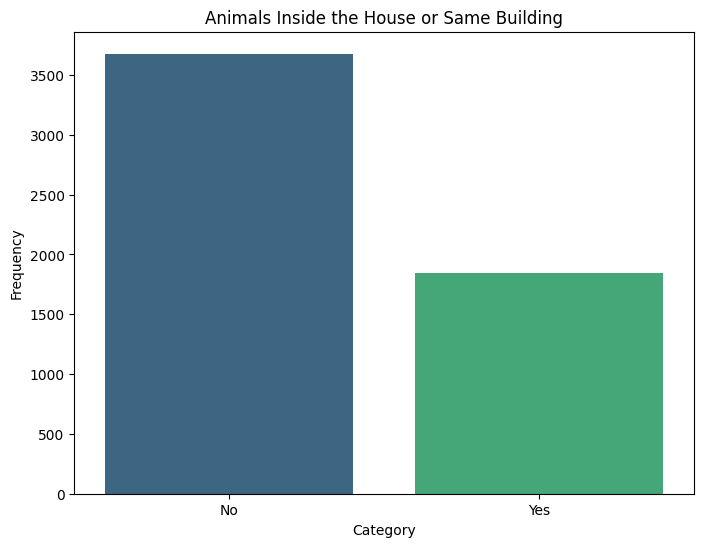

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

animals_inside_house_var = 'f4c_8'

label_mapping = {
    0: 'No',
    1: 'Yes'
}

child_woman_household_copy2.loc[:, animals_inside_house_var] = child_woman_household_copy2[animals_inside_house_var].map(label_mapping)

filtered_df = child_woman_household_copy2[child_woman_household_copy2[animals_inside_house_var].isin(['No', 'Yes'])]

animals_inside_house_counts = filtered_df[animals_inside_house_var].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=animals_inside_house_counts.index, y=animals_inside_house_counts.values, hue=animals_inside_house_counts.index, palette='viridis', legend=False)
plt.title('Animals Inside the House or Same Building')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


#Observation

Based on the information above:

* Approximately 3,500 households don't have animals inside the house.
* Around **1,800 households do have animals inside the house**.

❗Keeping animals inside the house may pose challenges to hygiene and sanitation. Animal waste and dander can contribute to the spread of infections and pose a risk to health, especially if proper sanitation measures are not in place.

#Deworming

Let us explore if women have knowledge on dewarming pills.  

##Why deworming pills are important?

❗Deworming pills, also known as anthelminthic medication, are crucial for pregnant women as they help address the presence of parasitic worms in the body.

❗ Parasitic worms can interfere with the absorption of essential nutrients in the intestines, leading to malnutrition.

❗Worm infections during pregnancy have been associated with adverse birth outcomes, including low birth weight and preterm birth.

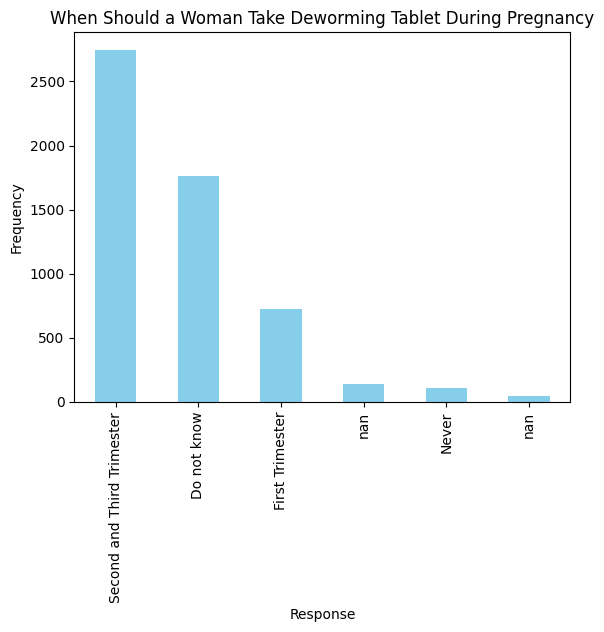

In [53]:
deworming_var = 'f6i_2'

deworming_counts = child_woman_household_copy2[deworming_var].value_counts()

response_labels = {
    0: 'Never',
    1: 'First Trimester',
    2: 'Second and Third Trimester',
    9: 'Do not know'
}

deworming_counts.index = deworming_counts.index.map(response_labels)

deworming_counts.plot(kind='bar', color='skyblue')
plt.title('When Should a Woman Take Deworming Tablet During Pregnancy')
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.show()

# **Q: When Should a Woman Take Deworming Tablet During Pregnancy?**

The participants were asked this question.

Still quite a large number of respondents lack basic information about deworming medicine.

💊





#Explore deeper

Let us see how many of those who did not mention handwashing before feeding children responded to the question about deworming.

Let us cross these two variables.

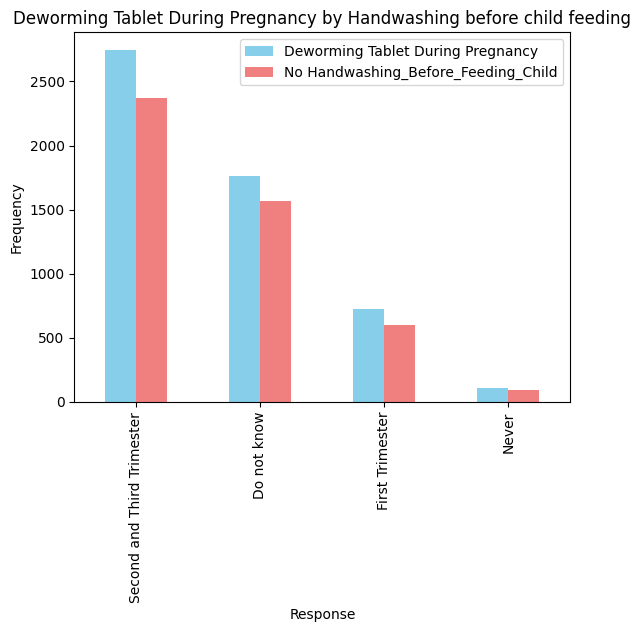

In [54]:
response_labels = {
    0: 'Never',
    1: 'First Trimester',
    2: 'Second and Third Trimester',
    9: 'Do not know'
}

no_handwashing_after_animal_handling = child_woman_household_copy2[
    child_woman_household_copy2['Handwashing_Before_Feeding_Child'] == 0
].copy()

deworming_var = 'f6i_2'

no_handwashing_after_animal_handling[deworming_var] = no_handwashing_after_animal_handling[deworming_var].map(response_labels)

deworming_counts_no_handwashing = no_handwashing_after_animal_handling[deworming_var].value_counts()

deworming_counts_all = child_woman_household_copy2[deworming_var].map(response_labels).value_counts()

combined_counts = pd.DataFrame({
    'Deworming Tablet During Pregnancy': deworming_counts_all,
    'No Handwashing_Before_Feeding_Child': deworming_counts_no_handwashing
})

combined_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Deworming Tablet During Pregnancy by Handwashing before child feeding')
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.show()


#Results: No handwashing before child feeding

It shows that a considerable number of those who didn't mention handwashing before child feeding also didn't know they need to take deworming tablets during pregrnancy.


Let us explore the sources of drinking water. In the dataframe the column is annotated as 'f4c_1'.

What is the main source of drinking water for members of your HH?

* 1= Protected Ring well
* 2= Bottled water
* 3=Tube well or Borehole
* 4=Stone tap
* 5= Dhara/piped water
* 8 = Other (stream, river, pond, canal, unprotected ring well.
* 9=Don't Know

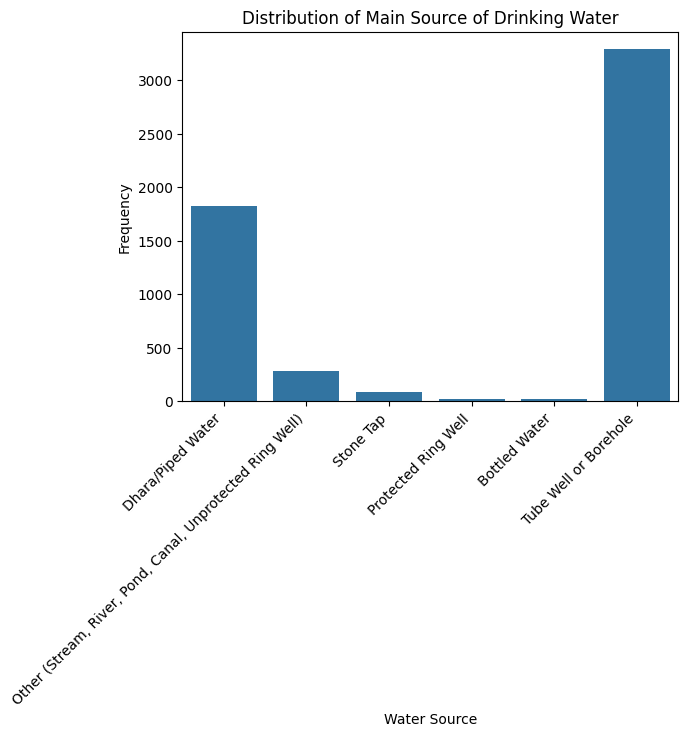

In [55]:
main_source_col = 'f4c_1'

water_source_labels = {
    1: 'Protected Ring Well',
    2: 'Bottled Water',
    3: 'Tube Well or Borehole',
    4: 'Stone Tap',
    5: 'Dhara/Piped Water',
    8: 'Other (Stream, River, Pond, Canal, Unprotected Ring Well)',
    9: "Don't Know"
}

child_woman_household['Main_Source_Drinking_Water_Label'] = child_woman_household[main_source_col].map(water_source_labels)

sns.countplot(data=child_woman_household, x='Main_Source_Drinking_Water_Label')
plt.title("Distribution of Main Source of Drinking Water")
plt.xlabel("Water Source")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

#Water Sources

🚰 The water sources seem to be relatively protected from potential contamination, but risks clearly remain.



#Illnesses

Let us explore what kind of illnesses the children in the surveyed households suffered from.

The data set has records of what kind of illnesses the children suffered from within the last 30 days.



*   (Poor appetite) within last 30 days
*   Chest in-drawing within last 30 days

*   Ear discharge within last 30 days
*   Eye infection within last 30 days

*   Grunting or wheezing within last 30 days
*   High fever within last 30 days

*   Low grade fever  within last 30 days
*   Malaria within last 30 days

*   Productive cough within last 30 days
*   Rapid breathing within last 30 days

*  Vomiting within last 30 days
*   loose watery stools >=4 times/day within last 30 days




Let us create a dictionary of these variables.

In [56]:
health_issues_children = {
    'f7f_1a': 'Loose_Stools',
    'f7f_1b': 'Cough',
    'f7f_1c': 'Rapid_Breathing',
    'f7f_1d': 'Grunting_Wheezing',
    'f7f_1e': 'Chest_In_drawing',
    'f7f_1f': 'Low_Fever',
    'f7f_1g': 'High_Fever',
    'f7f_1h': 'Malaria',
    'f7f_1i': 'Vomiting',
    'f7f_1j': 'Poor_Appetite',
    'f7f_1k': 'Ear_Discharge',
    'f7f_1l': 'Eye_Infection',
}

Now we rename in our data frame by creating another copy of our data frame:

```
child_woman_household
```
and randomly select two variables to see the values within the columns.


In [57]:
child_woman_household_copy3 = child_woman_household.copy()

child_woman_household_copy3.rename(columns=health_issues_children, inplace=True)

child_woman_household_copy3[['Loose_Stools', 'Cough']]

,Loose_Stools,Cough
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
5524,0,1
5525,0,0
5526,0,0
5527,0,0


#Health Issues of Children

Let us see visually what is the prevailing illness among the observed children.  

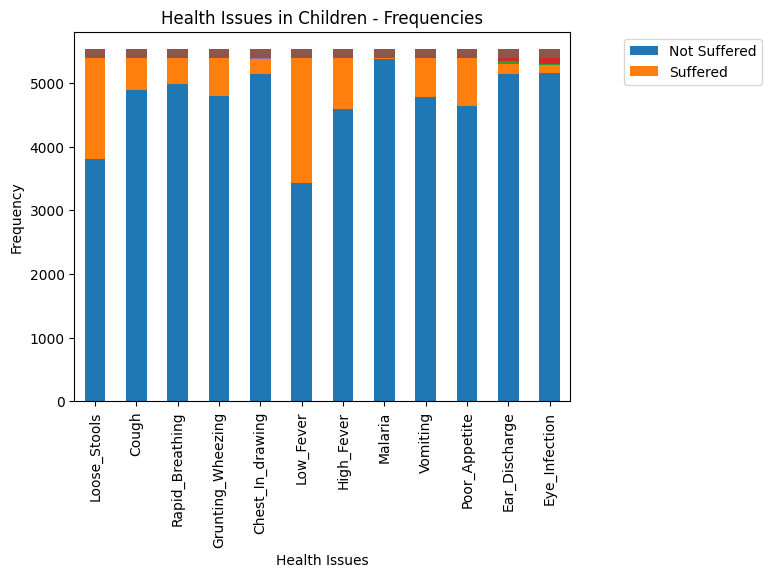

In [58]:
health_issues_vars = list(health_issues_children.values())

health_issues_counts = child_woman_household_copy3[health_issues_vars].apply(lambda x: x.value_counts()).T

health_issues_counts.plot(kind='bar', stacked=True)
plt.title('Health Issues in Children - Frequencies')
plt.xlabel('Health Issues')
plt.ylabel('Frequency')

legend_labels = ['Not Suffered', 'Suffered']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.4, 1.0))

plt.show()


#Observations

It is interesting to see that the second most occured ailment within the last 30 days is loose stool, which is likely to be associated with low fever, high fever, and poor appetatite.

This suggests a possible link between gastrointestinal health and overall well-being.

It could be indicative of issues related to hygiene, nutrition, or even potential infectious diseases.


## Let us now explore **WOMEN** health issues

Let us now explore what sorts of ailments the women experienced.

The data provides us with the following list of health issues that the women in Nepal faced.

##List of health issues

*   Blood in sputum within last 30 days

*   Blood or white mucus in stool within last 30 days

*   Chest in-drawing within last 30 days

*   Convulsions within last 30 days

*   Grunting or wheezing within last 30 days

*   High fever within last 30 days

*   Low grade fever  within last 30 days

*   Lower abdominal pain within last 30 days

*   Malaria within last 30 days
*   Nausea within last 30 days

*   Painful or burning urination within last 30 days


*   Poor appetite within last 30 days


*   Productive cough within last 30 days


*   Rapid breathing within last 30 days


*   Severe headache within last 30 days


*   Swelling of hands or face within last 30 days


*   Vomiting within last 30 days


*   loose watery stools >=4 times/day within last 30


##Next Steps

Let us create another dictionary

In [59]:
women_health_issues = {
    'f6b_a1': 'Convulsions',
    'f6b_b1': 'Swelling_Hands_Face',
    'f6b_c1': 'Severe_Headache',
    'f6b_d1': 'Blood_Sputum',
    'f6b_e1': 'Painful_Burning_Urination',
    'f6b_f1': 'Loose_Stools',
    'f6b_g1': 'Blood_Mucus_Stool',
    'f6b_h1': 'Productive_Cough',
    'f6b_i1': 'Rapid_Breathing',
    'f6b_j1': 'Grunting_Wheezing',
    'f6b_k1': 'Chest_In_drawing',
    'f6b_l1': 'Low_Fever',
    'f6b_m1': 'High_Fever',
    'f6b_n1': 'Malaria',
    'f6b_o1': 'Lower_Abdominal_Pain',
    'f6b_p1': 'Nausea',
    'f6b_q1': 'Vomiting',
    'f6b_r1': 'Poor_Appetite',
}
women_health_issues

{'f6b_a1': 'Convulsions',
 'f6b_b1': 'Swelling_Hands_Face',
 'f6b_c1': 'Severe_Headache',
 'f6b_d1': 'Blood_Sputum',
 'f6b_e1': 'Painful_Burning_Urination',
 'f6b_f1': 'Loose_Stools',
 'f6b_g1': 'Blood_Mucus_Stool',
 'f6b_h1': 'Productive_Cough',
 'f6b_i1': 'Rapid_Breathing',
 'f6b_j1': 'Grunting_Wheezing',
 'f6b_k1': 'Chest_In_drawing',
 'f6b_l1': 'Low_Fever',
 'f6b_m1': 'High_Fever',
 'f6b_n1': 'Malaria',
 'f6b_o1': 'Lower_Abdominal_Pain',
 'f6b_p1': 'Nausea',
 'f6b_q1': 'Vomiting',
 'f6b_r1': 'Poor_Appetite'}

In [60]:
child_woman_household_copy4 = child_woman_household.copy()

child_woman_household_copy4.rename(columns=women_health_issues, inplace=True)

child_woman_household_copy4[['Vomiting', 'Loose_Stools']]

,Vomiting,Loose_Stools
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
5524,0,0
5525,0,0
5526,0,0
5527,0,0


<Figure size 1200x800 with 0 Axes>

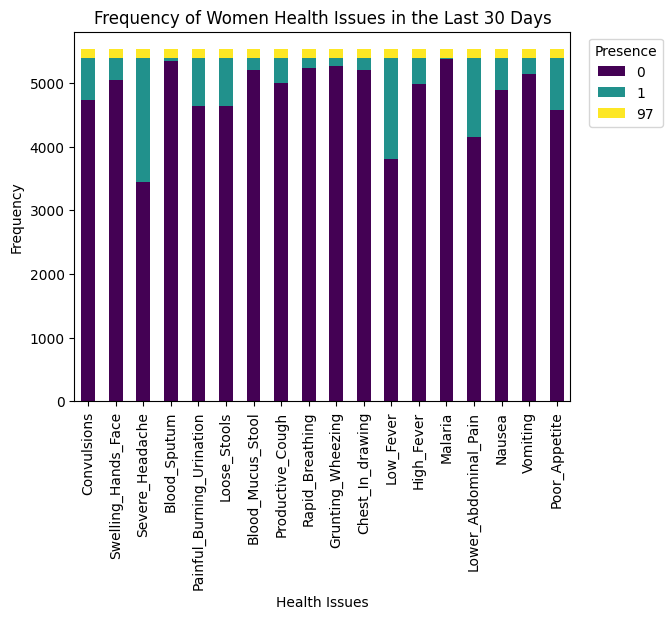

In [61]:
women_health_vars = list(women_health_issues.values())
women_health_data = child_woman_household_copy4[women_health_vars]

women_health_data = women_health_data.dropna()

health_issue_counts = women_health_data.apply(lambda x: x.value_counts()).T

plt.figure(figsize=(12, 8))
health_issue_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Frequency of Women Health Issues in the Last 30 Days')
plt.xlabel('Health Issues')
plt.ylabel('Frequency')
plt.legend(title='Presence', loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()

#Women Health Issues: Second volume

Let us explore another set of health issues experienced by women within the last 7 Days


* Blood in sputum within last 7 days
* Blood or white mucus in stool within last 7 days
* Chest in-drawing within last 7 days
* Convulsions within last 7 days
* Grunting or wheezing within last 7 days
* High fever within last 7 days
* Low grade fever  within last 7 days
* Lower abdominal pain within last 7 days
* Malaria within last 7 days
* Nausea within last 7 days
* Painful or burning urination within last 7 days
* Poor appetite within last 7 days
* Productive cough within last 7 days
* Rapid breathing within last 7 days
* Severe headache within last 7 days
* Swelling of hands or face within last 7 days
* Vomiting within last 7 days
* Loose watery stools within last 7 days

In [62]:
women_health_issues_7days = {
    'f6b_a2': 'convulsions_days',
    'f6b_b2': 'swelling_hands_face_days',
    'f6b_c2': 'severe_headache_days',
    'f6b_d2': 'blood_sputum_days',
    'f6b_e2': 'painful_burning_urination_days',
    'f6b_f2': 'loose_stools_days',
    'f6b_g2': 'blood_mucus_stool_days',
    'f6b_h2': 'productive_cough_days',
    'f6b_i2': 'rapid_breathing_days',
    'f6b_j2': 'grunting_wheezing_days',
    'f6b_k2': 'chest_in_drawing_days',
    'f6b_l2': 'low_fever_days',
    'f6b_m2': 'high_fever_days',
    'f6b_n2': 'malaria_days',
    'f6b_o2': 'lower_abdominal_pain_days',
    'f6b_p2': 'nausea_days',
    'f6b_q2': 'vomiting_days',
    'f6b_r2': 'poor_appetite_days',
}

child_woman_household_copy5 = child_woman_household.copy()

child_woman_household_copy5.rename(columns=women_health_issues_7days, inplace=True)

women_health_issues_7days


{'f6b_a2': 'convulsions_days',
 'f6b_b2': 'swelling_hands_face_days',
 'f6b_c2': 'severe_headache_days',
 'f6b_d2': 'blood_sputum_days',
 'f6b_e2': 'painful_burning_urination_days',
 'f6b_f2': 'loose_stools_days',
 'f6b_g2': 'blood_mucus_stool_days',
 'f6b_h2': 'productive_cough_days',
 'f6b_i2': 'rapid_breathing_days',
 'f6b_j2': 'grunting_wheezing_days',
 'f6b_k2': 'chest_in_drawing_days',
 'f6b_l2': 'low_fever_days',
 'f6b_m2': 'high_fever_days',
 'f6b_n2': 'malaria_days',
 'f6b_o2': 'lower_abdominal_pain_days',
 'f6b_p2': 'nausea_days',
 'f6b_q2': 'vomiting_days',
 'f6b_r2': 'poor_appetite_days'}

In [63]:
child_woman_household_copy5 [['swelling_hands_face_days','severe_headache_days']]

,swelling_hands_face_days,severe_headache_days
0,0,1
1,0,3
2,0,3
3,0,3
4,0,3
...,...,...
5524,0,0
5525,0,0
5526,0,0
5527,0,0


These variables are different. Their values count frequencies. So answers are not binary like 'yes' or 'no'.

See the example below:


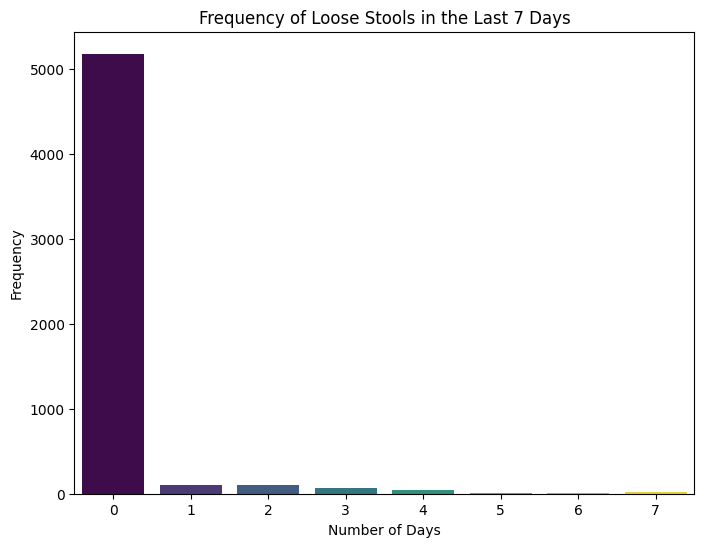

In [64]:
loose_stools_days = child_woman_household_copy5['loose_stools_days']

loose_stools_days = loose_stools_days.dropna()

plt.figure(figsize=(8, 6))
sns.countplot(x=loose_stools_days, hue=loose_stools_days, palette='viridis', legend=False)
plt.title('Frequency of Loose Stools in the Last 7 Days')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.show()



#Let us find the largest number incidents per health issue

Below I will count how many cases of health issues the respondents experienced in the last seven days per type of health issue.

Just a quick reference, we will be summing up the frequencey of incidents per the health issue according to this list:

* Blood in sputum within last 7 days
* Blood or white mucus in stool within last 7 days
* Chest in-drawing within last 7 days
* Convulsions within last 7 days
* Grunting or wheezing within last 7 days
* High fever within last 7 days
* Low grade fever within last 7 days
* Lower abdominal pain within last 7 days
* Malaria within last 7 days
* Nausea within last 7 days
* Painful or burning urination within last 7 days
* Poor appetite within last 7 days
* Productive cough within last 7 days
* Rapid breathing within last 7 days
* Severe headache within last 7 days
* Swelling of hands or face within last 7 days
* Vomiting within last 7 days
* Loose watery stools within last 7 days

In [65]:
health_issues_days_vars = list(women_health_issues_7days.values())
health_issues_days_counts = child_woman_household_copy5[health_issues_days_vars]

health_issues_days_counts = health_issues_days_counts.dropna()

health_issues_days_counts

,convulsions_days,swelling_hands_face_days,severe_headache_days,blood_sputum_days,painful_burning_urination_days,loose_stools_days,blood_mucus_stool_days,productive_cough_days,rapid_breathing_days,grunting_wheezing_days,chest_in_drawing_days,low_fever_days,high_fever_days,malaria_days,lower_abdominal_pain_days,nausea_days,vomiting_days,poor_appetite_days
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0
1,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
3,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
4,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
5525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5526,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4
5527,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4


Here we are summing up all the cases the women experienced in the last seven days.

In [66]:
variable_sums = health_issues_days_counts.sum()
variable_sums

,0
convulsions_days,1140
swelling_hands_face_days,634
severe_headache_days,3159
blood_sputum_days,64
painful_burning_urination_days,1386
loose_stools_days,917
blood_mucus_stool_days,280
productive_cough_days,889
rapid_breathing_days,366
grunting_wheezing_days,281


Here I am checking the top five most frequent health issues.

In [67]:
top_five_variables = variable_sums.nlargest(5).index
top_five_variables

Index(['severe_headache_days', 'lower_abdominal_pain_days',
       'poor_appetite_days', 'low_fever_days',
       'painful_burning_urination_days'],
      dtype='object')

Let us see the whole list in the descending order.

So the most frequent type of health issues that the women experienced within the last seven days are:



1.   Sever Headache
2.   Lower Abdominal Pain
3.   Poor Appetitte
4.   Low Fever
5.   Painful Burning Urination


Unlike the health issues experienced by children, for the women loose stool was not a major issue.

However the top five health problems, identified above might easily be compounded by poor hygiene norms.  

In [68]:
health_issues_summary = pd.DataFrame({
    'Health_Issue': variable_sums.index,
    'Number_of_Cases': variable_sums.values
})
health_issues_summary = health_issues_summary.sort_values(by='Number_of_Cases', ascending=False)
health_issues_summary

,Health_Issue,Number_of_Cases
2,severe_headache_days,3159
14,lower_abdominal_pain_days,2368
17,poor_appetite_days,1940
11,low_fever_days,1756
4,painful_burning_urination_days,1386
0,convulsions_days,1140
15,nausea_days,962
5,loose_stools_days,917
7,productive_cough_days,889
1,swelling_hands_face_days,634


#Conclusion

The nutrition data from Nepal shows that my hypothesis was well grounded.


1. **Duration of breastfeeding positively affects the height and weight of children.**

2. **There are many hygiene norms that could be improved to help children avoid stunting.**

To show evidence I ran regression models as well as visualized through graphs, including predicted observations and bar charts.

I also unpacked the potential symptoms of poor hygiene by looking at the list of health issues that both women and children experienced recently. Unfortunately we saw some symptoms of diarhhea such as loose stool which hinders digestion of nutrients.    




